# A practice of Support Vector Machine
* A SVM classification model
* Data: coursera machine learning week 7
* SVM model
    * Linear model
    * Kernel model

## The advantages of SVM
* effective in high dimensional spaces
* effective where number of dimensions is greater than the number of samples
* memory efficient
* versatile by applying different Kernel functions

## The disadvantage of SVM
* overfitting, avoid it in choosing Kernel functions and regularization term
* no probability estimations

# Linear SVM model


In [4]:
import pandas as pd
df = pd.read_csv('./data/ex6data1.csv', names=['x1', 'x2', 'y'])

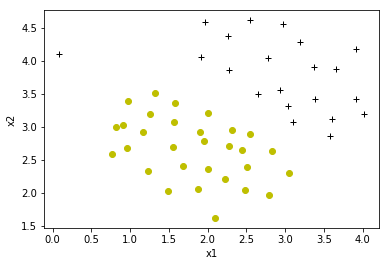

In [5]:
def plotData(df):
    from matplotlib import pyplot as plt
    x1 = df[df['y']==1]['x1']
    x2 = df[df['y']==0]['x1']
    y1 = df[df['y']==1]['x2']
    y2 = df[df['y']==0]['x2']    
    fig, ax = plt.subplots()
    ax.plot(x1,y1,"k+",x2,y2,"yo")
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    return (fig, ax)

fig, ax = plotData(df)

## Important parameters
* **X**: an array [n_samples, n_features]
* **y**: an array [n_samples]
* **penalty**: "l1" or "l2"
* **loss**: 'hinge', or 'squared_hinge'
* **tol**:  0.0001
* **C**: penalty of the misclassified error, a model with large C try to classifiy all the examples correctly
* **class_weight**: 'balanced'

## About the hinge loss function
The hinge loss function is $h(z) = max(1-z, 0)$  
The squared hinge loss function is $h^2(z)$  

The hinge function is not differentiable at $x=1$, we define
$h'(1) = c$, for $-1\le c \le 0$  
The squared hinge function is differentiable at $x=1$, $h'(1) = 0$

The overall cost function
$$
\underset{\theta}{\mathrm{min}}\;C\sum_{i=1}^m \left[ y^{(i)} cost_1(\theta^T x^{(i)}) + (1-y^{(i)}) cost_0(\theta^T x^{(i)}) \right] + {1\over 2} \sum_{i=1}^n \theta_j^2
$$

## About Feature Selection
In sklearn, a random number generator to select feature when fitting the model. It is common to have slightly different result for the same input data. It that happened, try with a smaller <mark style="background-color:gray;color:white">tol</mark> parameter



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.svm import LinearSVC

X = df.loc[:, ['x1', 'x2']].values
y = df.loc[:, ['y']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

model = LinearSVC(C=1.0, loss='hinge', class_weight=None, tol=1e-4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("accuracy score = %.5f\n" %accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score = 1.00000

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         5
          1       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         6



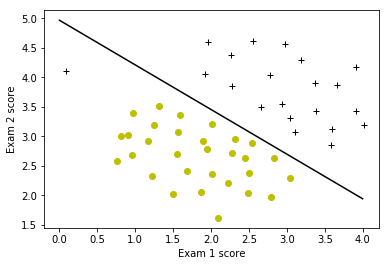

In [7]:
import numpy as np
def plotBoundary(model, X, y):
    from matplotlib import pyplot as plt
    x1 = X[y==1,0]
    x2 = X[y==0,0]
    y1 = X[y==1,1]
    y2 = X[y==0,1]    
    fig, ax = plt.subplots()
    ax.plot(x1,y1,"k+",x2,y2,"yo")
    ax.set_xlabel('Exam 1 score')
    ax.set_ylabel('Exam 2 score')
    
    a = model.coef_[0]
    b = model.intercept_[0]
    xx = np.linspace(0,4)
    yy = (-a[0]*xx - b)/a[1]
    ax.plot(xx, yy, 'k-')

plotBoundary(model, X, y)

# Kernel SVM model

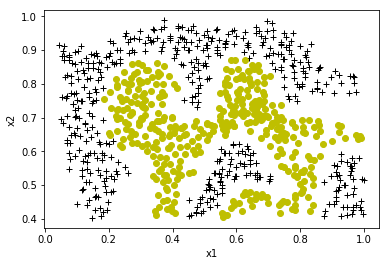

In [8]:
df2 = pd.read_csv('./data/ex6data2.csv', names=['x1', 'x2', 'y'])
fig, ax = plotData(df2)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.svm import SVC

X = df2.loc[:, ['x1', 'x2']].values
y = df2.loc[:, ['y']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

model = SVC(C=1.0, gamma=100.0, kernel='rbf', class_weight=None, tol=1e-4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("accuracy score = %.5f\n" %accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score = 0.97701

             precision    recall  f1-score   support

          0       0.97      0.97      0.97        37
          1       0.98      0.98      0.98        50

avg / total       0.98      0.98      0.98        87



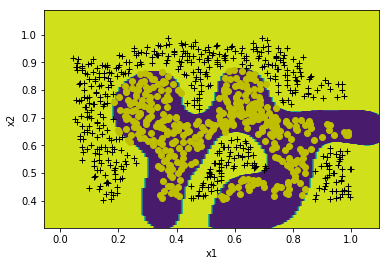

In [28]:
import numpy as np
from matplotlib import pyplot as plt
x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.001))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig, ax = plotData(df2)
ax.contourf(xx, yy, Z)

# Use another dataset
* use dataset for previous Logistic Regression
* this dataset **does NOT** have a large margin


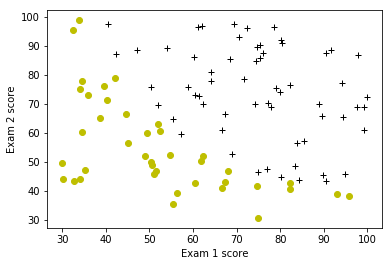

In [18]:
import pandas as pd
from matplotlib import pyplot as plt
dir_data = './data/ex2data1.txt'
df = pd.read_csv(dir_data, names=['score1', 'score2', 'admitted'])
def plotData(df):
    x1 = df[df['admitted']==1]['score1']
    x2 = df[df['admitted']==0]['score1']
    y1 = df[df['admitted']==1]['score2']
    y2 = df[df['admitted']==0]['score2']    
    fig, ax = plt.subplots()
    ax.plot(x1,y1,"k+",x2,y2,"yo")
    ax.set_xlabel('Exam 1 score')
    ax.set_ylabel('Exam 2 score')
    return (fig, ax)

fig, ax = plotData(df)

## Linear SVM Model

**Result**: even we set C=100.0 (overfitting), 
* the performance of linear SVM model is still poor!
* unfortunately, the decision boundary is not only unstable but also highly depends on initial random state

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.svm import LinearSVC

X = df.loc[:, ['score1', 'score2']].values
y = df.loc[:, ['admitted']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

accuracy score = 0.70000



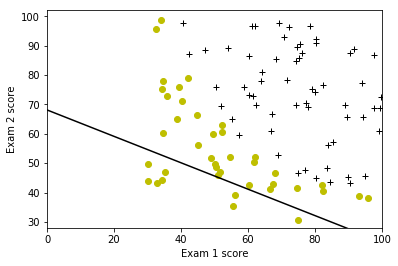

In [154]:
model = LinearSVC(C=10000, loss='hinge', class_weight=None, tol=1e-6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("accuracy score = %.5f\n" %accuracy_score(y_test, y_pred))

import numpy as np
def plotBoundary(model, X, y):
    from matplotlib import pyplot as plt
    x1 = X[y==1,0]
    x2 = X[y==0,0]
    y1 = X[y==1,1]
    y2 = X[y==0,1]    
    fig, ax = plt.subplots()
    ax.plot(x1,y1,"k+",x2,y2,"yo")
    ax.set_xlabel('Exam 1 score')
    ax.set_ylabel('Exam 2 score')
    
    a = model.coef_[0]
    b = model.intercept_[0]
    xx = np.linspace(0,100)
    yy = (-a[0]*xx - b)/a[1]
    ax.plot(xx, yy, 'k-')
    ax.set_xlim([0,100])
    ax.set_ylim([28,102])

plotBoundary(model, X, y)

## Kernel model
* The kernel SVM works great
* The result is sensitive to gamma


i=0, j=0, gamma=0.0001 accuracy score = 0.80000
i=0, j=1, gamma=0.001 accuracy score = 0.80000
i=1, j=0, gamma=0.01 accuracy score = 0.90000
i=1, j=1, gamma=0.1 accuracy score = 0.90000
i=2, j=0, gamma=0.5 accuracy score = 0.70000
i=2, j=1, gamma=1.0 accuracy score = 0.70000


Text(0.5,0,'Exam 1 score')

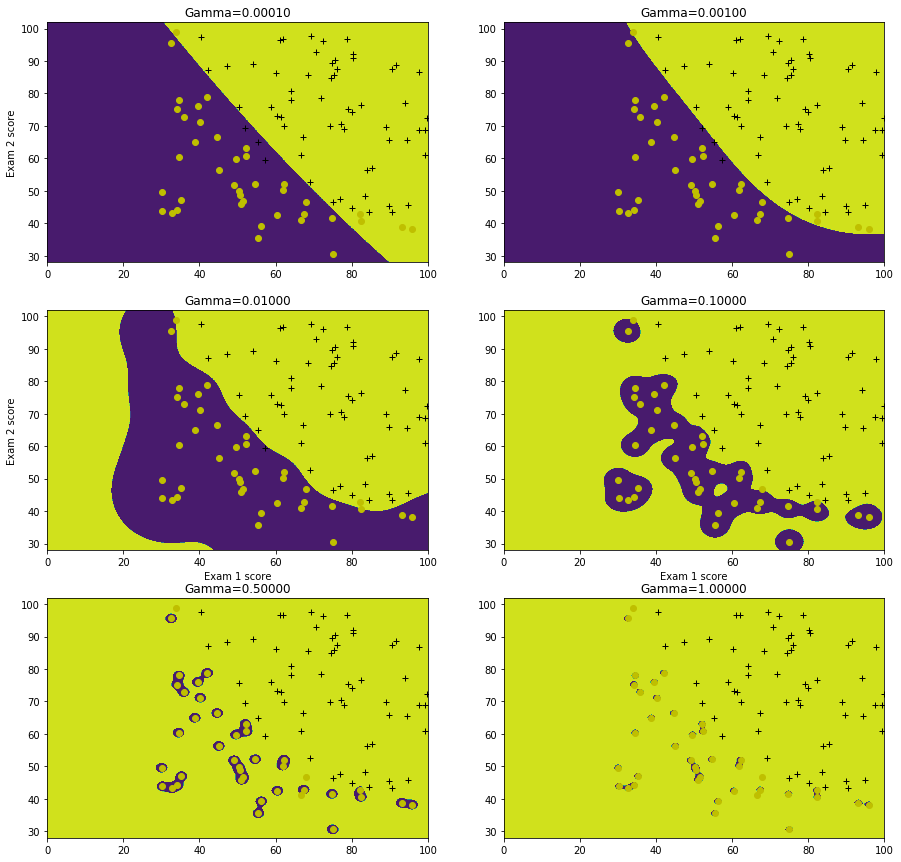

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.svm import SVC

X = df.loc[:, ['score1', 'score2']].values
y = df.loc[:, ['admitted']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

x_min, x_max = 0.0, 100.0
y_min, y_max = 28.0, 102.0
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
fig, ax = plt.subplots(3,2, figsize=(15,15))

gammas = np.array([ [0.0001, 0.001], [0.01, 0.1], [0.5, 1.0] ])
for i in range(3):
    for j in range(2):
        model = SVC(C=1.0, gamma=gammas[i][j], kernel='rbf', class_weight=None, tol=1e-4)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print("i=%s, j=%s, gamma=%s accuracy score = %.5f" %(i,j,gammas[i][j], accuracy_score(y_test, y_pred)))    
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        x1 = df[df['admitted']==1]['score1']
        x2 = df[df['admitted']==0]['score1']
        y1 = df[df['admitted']==1]['score2']
        y2 = df[df['admitted']==0]['score2']    
        ax[i][j].plot(x1,y1,"k+",x2,y2,"yo")
        ax[i][j].set_title("Gamma=%.5f" %gammas[i][j])
        ax[i][j].contourf(xx, yy, Z)
ax[0][0].set_ylabel('Exam 2 score')
ax[1][0].set_ylabel('Exam 2 score')
ax[1][0].set_xlabel('Exam 1 score')
ax[1][1].set_xlabel('Exam 1 score')